In [1]:
visium_hd_zarr_path = "pea_spatialdata.zarr"

In [2]:
import spatialdata as sd

sdata = sd.read_zarr(visium_hd_zarr_path)
sdata

c:\Users\P70078823\AppData\Local\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\P70078823\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\P70078823\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


SpatialData object, with associated Zarr store: C:\Users\P70078823\Desktop\VisiumHD\pea_spatialdata.zarr
├── Shapes
│     └── 'my_msi_dataset_pixels': GeoDataFrame shape: (17423, 1) (2D shapes)
└── Tables
      └── 'my_msi_dataset': AnnData (17423, 331701)
with coordinate systems:
    ▸ 'global', with elements:
        my_msi_dataset_pixels (Shapes)
    ▸ 'my_msi_dataset', with elements:
        my_msi_dataset_pixels (Shapes)

In [3]:
# let's make the var names unique; this improves performance in accessing the tabular data and is necessary to be able to plot the data
for table in sdata.tables.values():
    table.var_names_make_unique()

c:\Users\P70078823\AppData\Local\anaconda3\Lib\site-packages\spatialdata\_core\_elements.py:105: UserWarning: Key `my_msi_dataset_pixels` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
c:\Users\P70078823\AppData\Local\anaconda3\Lib\site-packages\spatialdata\_core\_elements.py:125: UserWarning: Key `my_msi_dataset` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


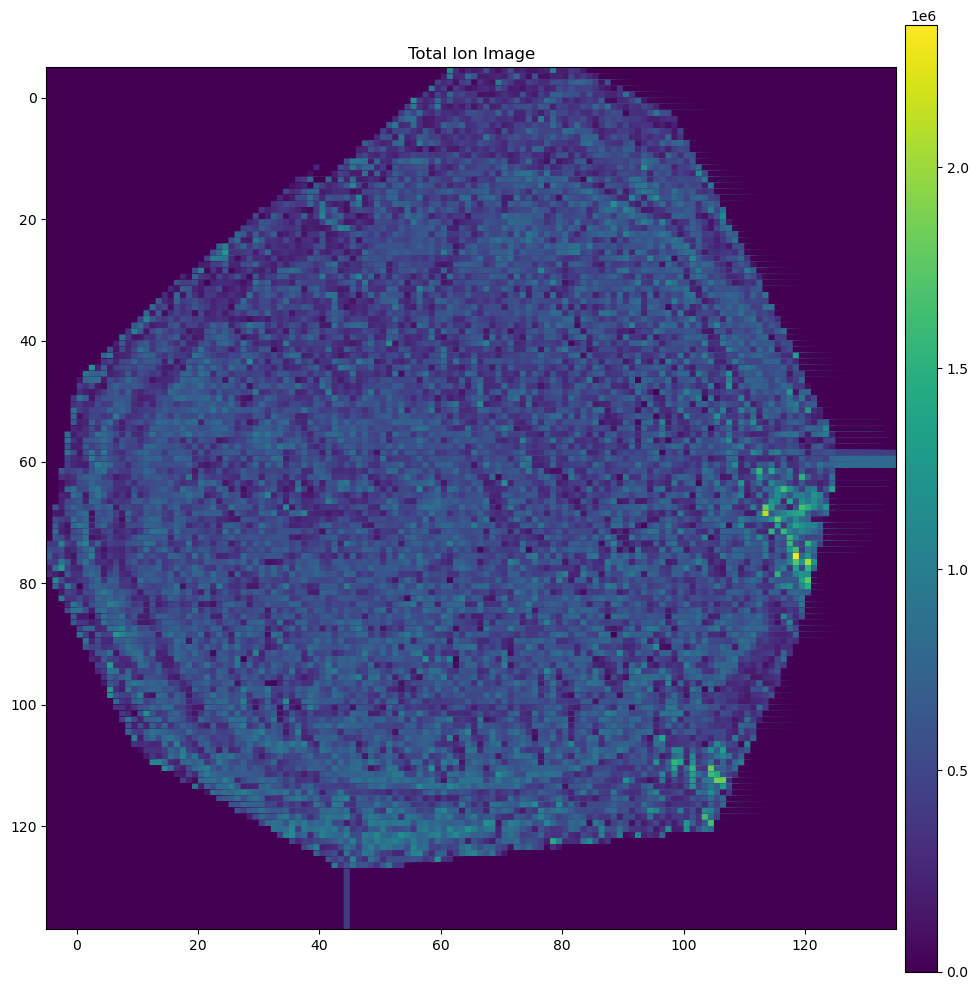

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from spatialdata.transformations import Identity, set_transformation
import matplotlib.pyplot as plt
import spatialdata_plot

# 1. Make sure we have transformations for plotting
# If your shapes don't have transformations yet, add them
set_transformation(
    sdata.shapes["my_msi_dataset_pixels"],
    transformation=Identity(),
    to_coordinate_system="global"
)

# 2. Get the table with the MSI data
table_name = list(sdata.tables.keys())[0]
table = sdata.tables[table_name]

# 3. Calculate the total ion count for each pixel by summing across all m/z values
# Since the data is in sparse format, we need to sum along axis 1 (across features)
total_ion_counts = np.array(table.X.sum(axis=1)).flatten()

# 4. Add the total ion count as a new column in the observations dataframe
table.obs["total_ion_count"] = total_ion_counts

# 5. Plot the total ion image
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Use the total_ion_count column for coloring
sdata.pl.render_shapes(
    "my_msi_dataset_pixels", 
    color="total_ion_count",  # Use our calculated total ion counts
    method="matplotlib",
    # Optional: You can customize the colormap
    cmap="viridis",  # Try "hot", "jet", or other colormaps
    # Optional: If the contrast needs adjustment, set vmin and vmax
    # vmin=np.percentile(total_ion_counts, 1),  # Exclude bottom 1% 
    # vmax=np.percentile(total_ion_counts, 99)  # Exclude top 1%
).pl.show(
    coordinate_systems="global", 
    ax=ax,
    colorbar=True  # Show colorbar for intensity values
)

plt.title("Total Ion Image")
plt.tight_layout()
plt.show()